In [4]:
import datetime

import nengo
import numpy as np
import seaborn as sns
import pandas as pd
import scipy
import scipy.io
import matplotlib.pyplot as plt
%matplotlib inline

In [7]:
mus = scipy.io.loadmat("results/mus.mat")["mus"]
print(mus.shape)

(1, 1302)


In [10]:
mat_bl = scipy.io.loadmat("results/blend_out.mat")['p_CTestPLMorph']
print(mat_bl.shape)

(1, 1302)


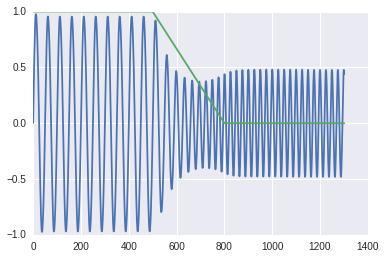

In [13]:
plt.plot(mat_bl.T)
plt.plot(mus.T)